<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Area Plots, Histograms, and Bar Charts

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Create and customize
    - Area plot
    - Histogram
    - Bar charts on a dataset

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Import Libraries](#0)<br>
2. [Fetching Data](#1)<br>
3. [Area Plots](#2)<br>
4. [Histograms](#3)<br>
5. [Bar Charts](#4)<br>

</div>

# Import Libraries <a id="0"></a>

Import the `matplotlib` library.

In [1]:
# Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
# %matplotlib inline

# Import Matplotlib (scientific plotting library) and set some default plotting parameters
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.9.4


# Fetching Data <a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from the United Nation's website

In this lab, we will focus on the Canadian Immigration data and use the **already cleaned dataset** and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skills [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)


In [10]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv',)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [11]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset.

In [12]:
df_can.shape

(195, 39)

Set the country name as index - useful for quickly looking up countries using .loc method.

In [13]:
df_can.set_index('Country', inplace=True)

In [15]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Let's create a list of years from 1980 - 2013

In [17]:
# This will come in handy later on
years = list(map(str, range(1980, 2014)))

# Area Plots <a id="2"></a>

In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a **Stacked Line Plot** or **Area plot**.

In [18]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 countries
top_5 = df_can.head(5)

top_5 = top_5[years].transpose() # transpose the dataframe

top_5.head()


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.

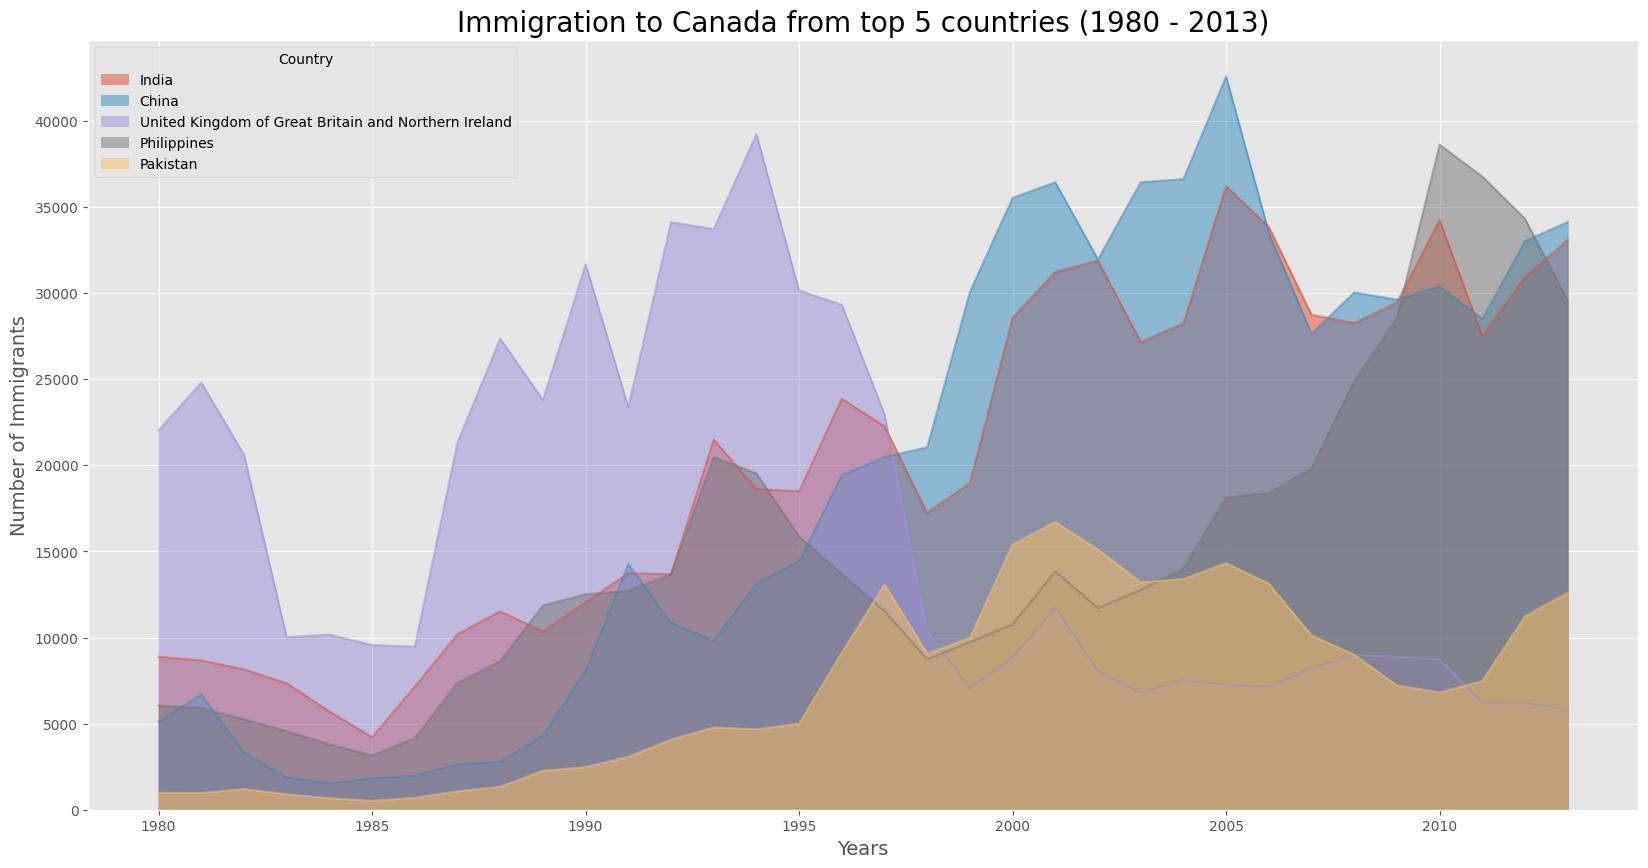

In [23]:
# let's change the index values of the df_top5 to type integer for plotting
top_5.index = top_5.index.map(int)

# area plot
top_5.plot(kind='area',
           stacked=False, # unstacked area plot
           alpha=0.5, # transparency level
           figsize=(20, 10), # pass a tuple (x, y) size
)

plt.title('Immigration to Canada from top 5 countries (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.show()


### Two types of plotting
As we discussed in the video lectures, there are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using `matplotlib.pyplot` as `'plt'`**

```python
    # Option 1: This is what we have been using so far
    top_5.plot(kind='area', alpha=0.35, figsize=(20,10))
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')
```

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title, or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.

Text(0.5, 0, 'Years')

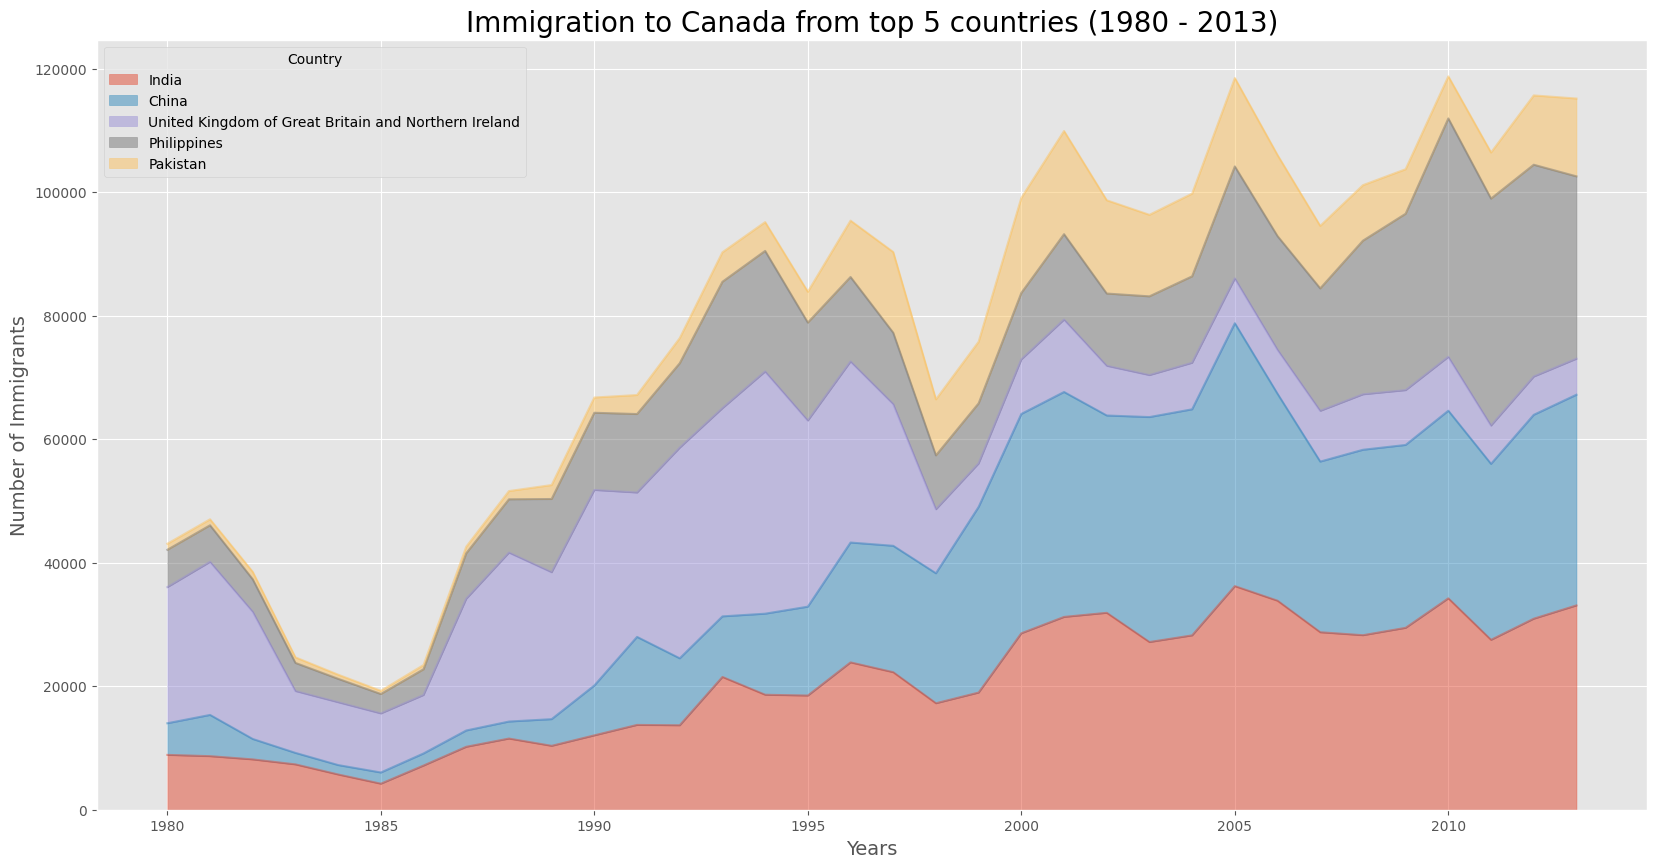

In [24]:
# Option 2: preferred option with more flexibility
ax = top_5.plot(kind='area',
                 stacked=True, # stacked area plot
                 alpha=0.5, # transparency level
                 figsize=(20, 10), # pass a tuple (x, y) size
)

ax.set_title('Immigration to Canada from top 5 countries (1980 - 2013)', fontsize=20)
ax.set_ylabel('Number of Immigrants', fontsize=14)
ax.set_xlabel('Years', fontsize=14)

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

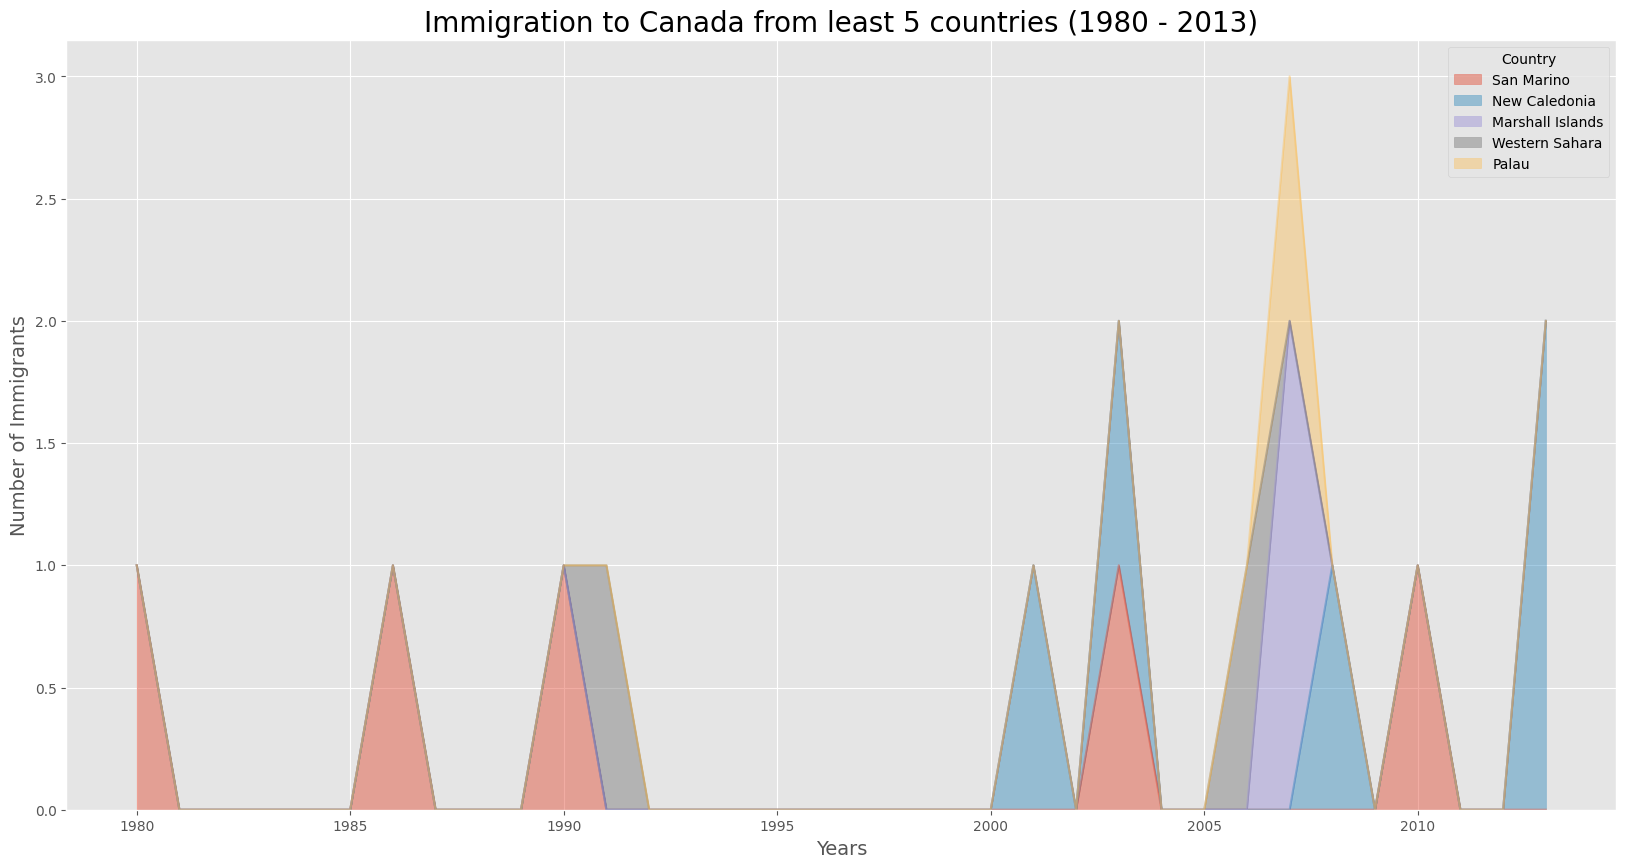

In [28]:
least_5 = df_can.tail(5) # get the least 5 countries

least_5 = least_5[years].transpose() # transpose the dataframe
least_5.index = least_5.index.map(int) # convert index to integer for plotting

# Create an area plot
least_5.plot(kind='area',
              stacked=True, # stacked area plot
              alpha=0.45, # transparency level
              figsize=(20, 10), # pass a tuple (x, y) size
)

# Set the title and labels
plt.title('Immigration to Canada from least 5 countries (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

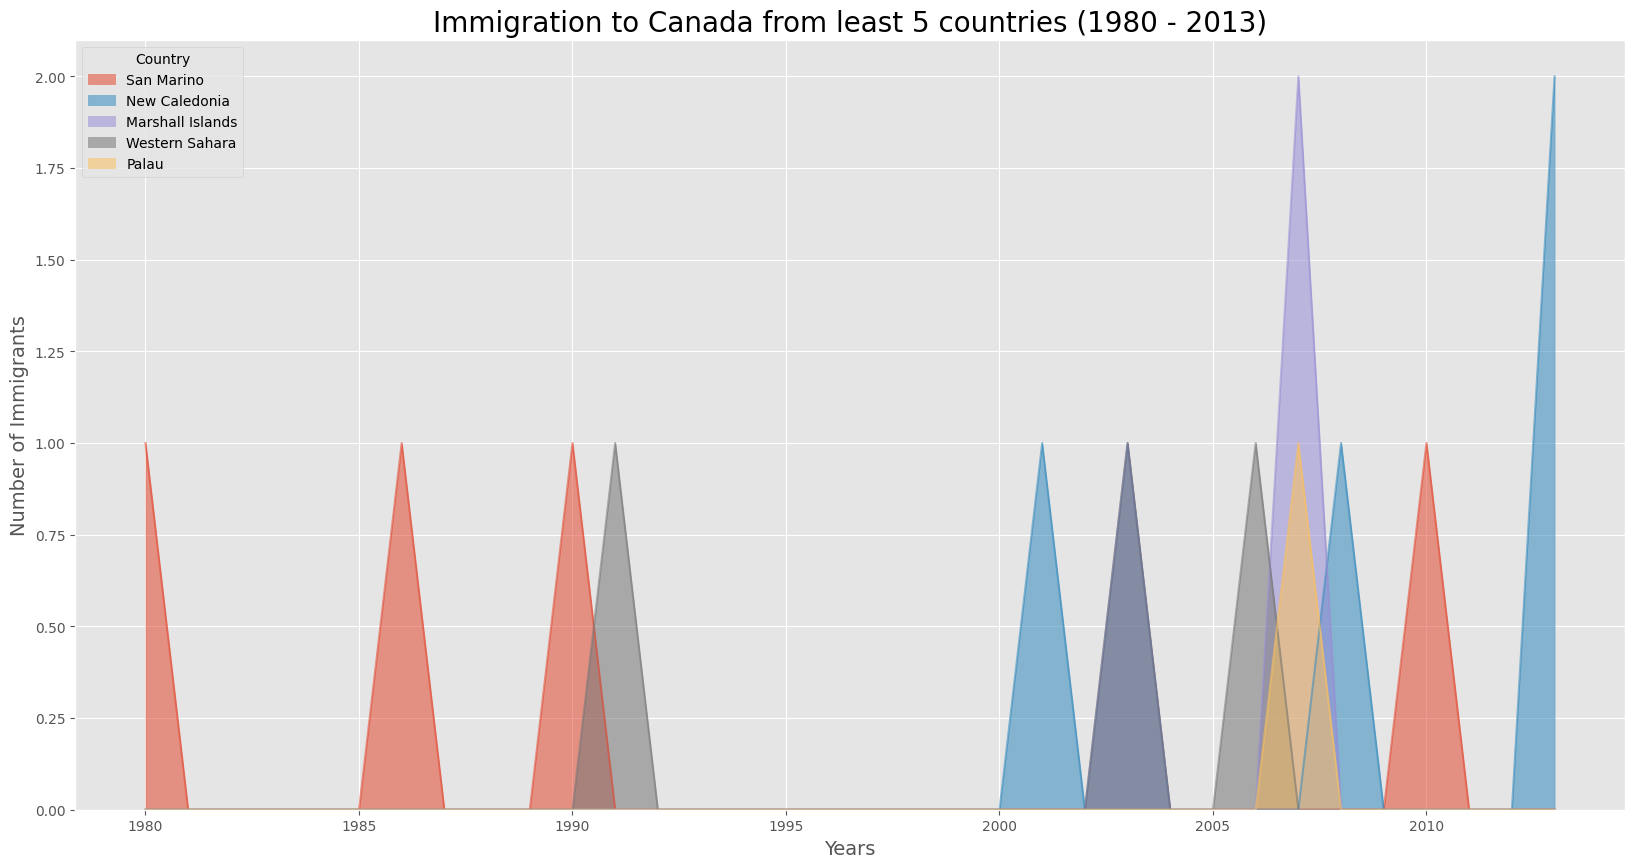

In [29]:
least_5 = df_can.tail(5) # get the least 5 countries

least_5 = least_5[years].transpose() # transpose the dataframe
least_5.index = least_5.index.map(int) # convert index to integer for plotting

# Create an area plot
least_5.plot(kind='area',
              stacked=False, # stacked area plot
              alpha=0.55, # transparency level
              figsize=(20, 10), # pass a tuple (x, y) size
)

# Set the title and labels
plt.title('Immigration to Canada from least 5 countries (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.show()

# Histograms <a id="3"></a>

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question**: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us **Numpy**'s `histrogram` method to get the bin ranges and frequency counts as follows:

In [30]:
# Let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [31]:
# hp.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency counts
print(bin_edges) # bin ranges

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


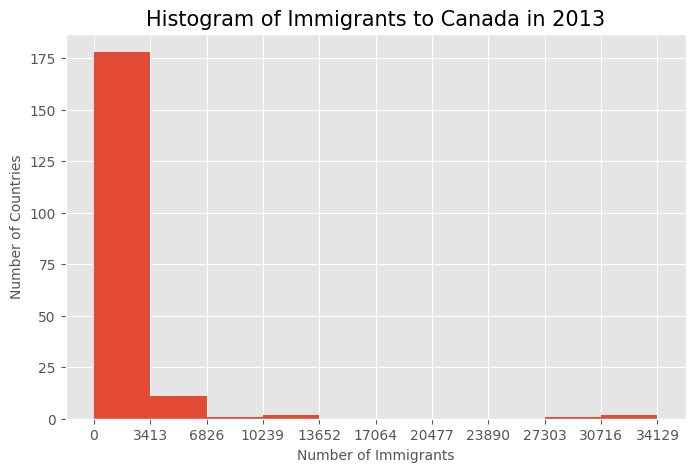

In [35]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

# Create a histogram of the 2013 data
df_can['2013'].plot(kind='hist',    # Histogram
                    figsize=(8, 5), # Figure size
                    xticks=bin_edges) # set the x-ticks to the 'bin_edges' variable

# set the title and labels
plt.title('Histogram of Immigrants to Canada in 2013', fontsize=15)
plt.ylabel('Number of Countries', fontsize=10)
plt.xlabel('Number of Immigrants', fontsize=10)

plt.show()

*Side Note:* We could use `df_can['2013'].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the *pandas* documentation for more info  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

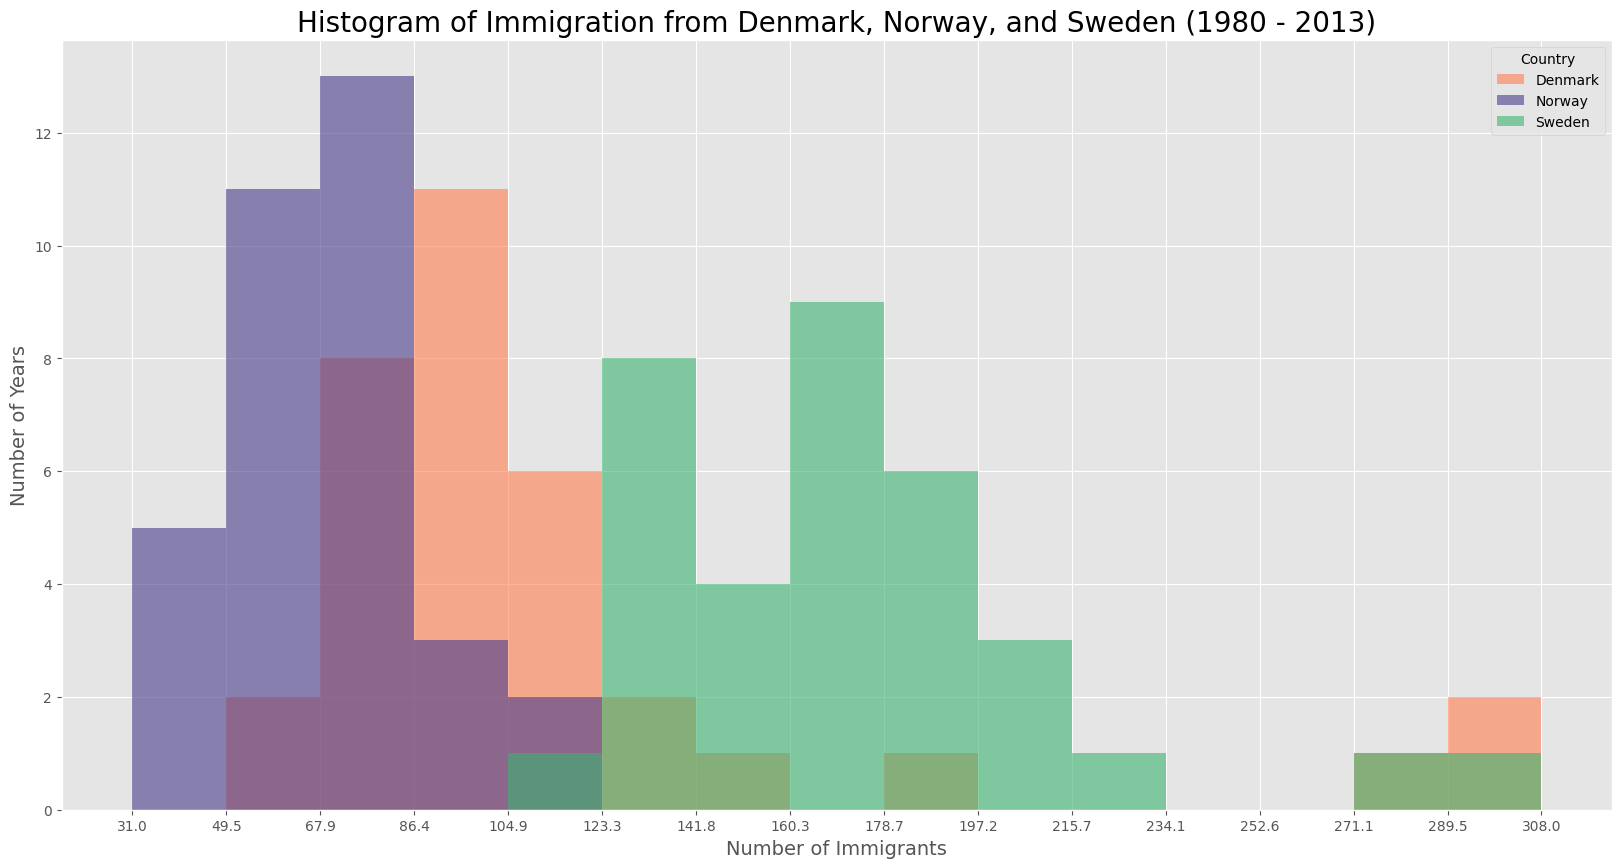

In [65]:
# Let's quickly view the data
df_DNS = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

df_DNS = df_DNS.transpose() # transpose the dataframe

df_DNS.index = df_DNS.index.map(int) # change the index values to type integer for plotting

# Create the bins_edge
count, bin_edges = np.histogram(df_DNS, 15)

# Create a histogram
df_DNS.plot.hist(figsize=(20,10),
                 alpha=0.6, # transparency level
                 bins=15, # number of bins
                 xticks=bin_edges, # set the x-ticks to the 'bin_edges' variable
                 color=['coral', 'darkslateblue', 'mediumseagreen'] # set the color of each histogram
)

# Set the title and labels
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Years', fontsize=14)
plt.xlabel('Number of Immigrants', fontsize=14)

plt.show()

**Tip**:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


If we do not want the plots to overlap each other, we can `stack` them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.

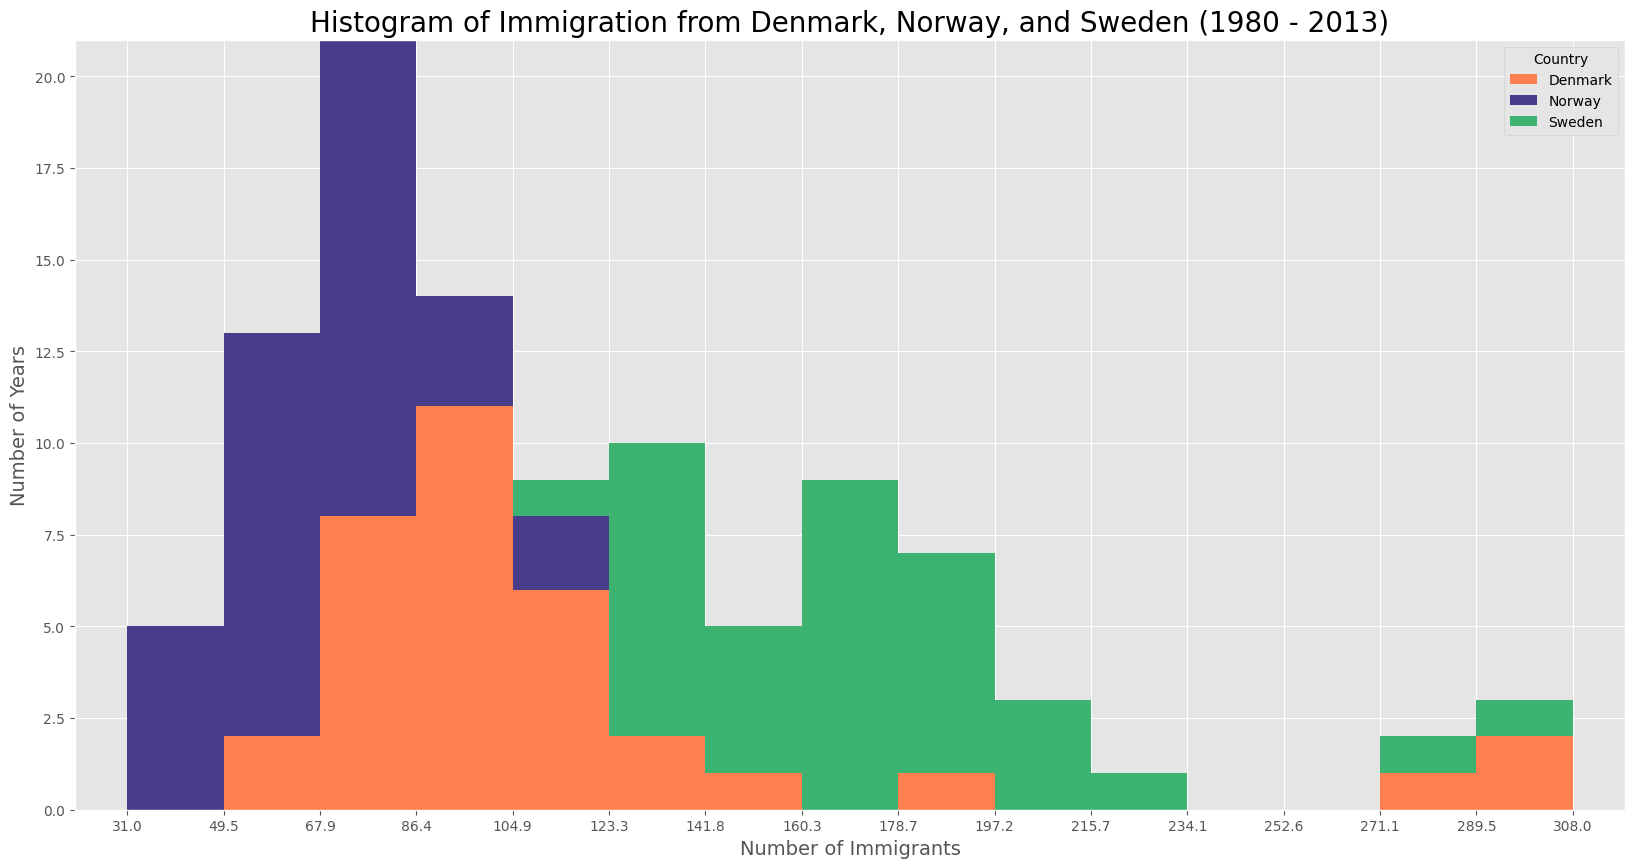

In [69]:
# Let's quickly view the data
df_DNS = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS = df_DNS.transpose() # transpose the dataframe
df_DNS.index = df_DNS.index.map(int) # change the index values to type integer for plotting

# Create the bins_edge
count, bin_edges = np.histogram(df_DNS, 15)
xmin = bin_edges[0] - 10 # first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10 # last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# Create a histogram
df_DNS.plot.hist(figsize=(20,10),            
                 bins=15, # number of bins
                 xticks=bin_edges, # set the x-ticks to the 'bin_edges' variable
                 color=['coral', 'darkslateblue', 'mediumseagreen'], # set the color of each histogram
                 stacked=True, # stack the plots
                 xlim=(xmin, xmax) # set the x-axis min and max values
)

# Set the title and labels
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Years', fontsize=14)
plt.xlabel('Number of Immigrants', fontsize=14)

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

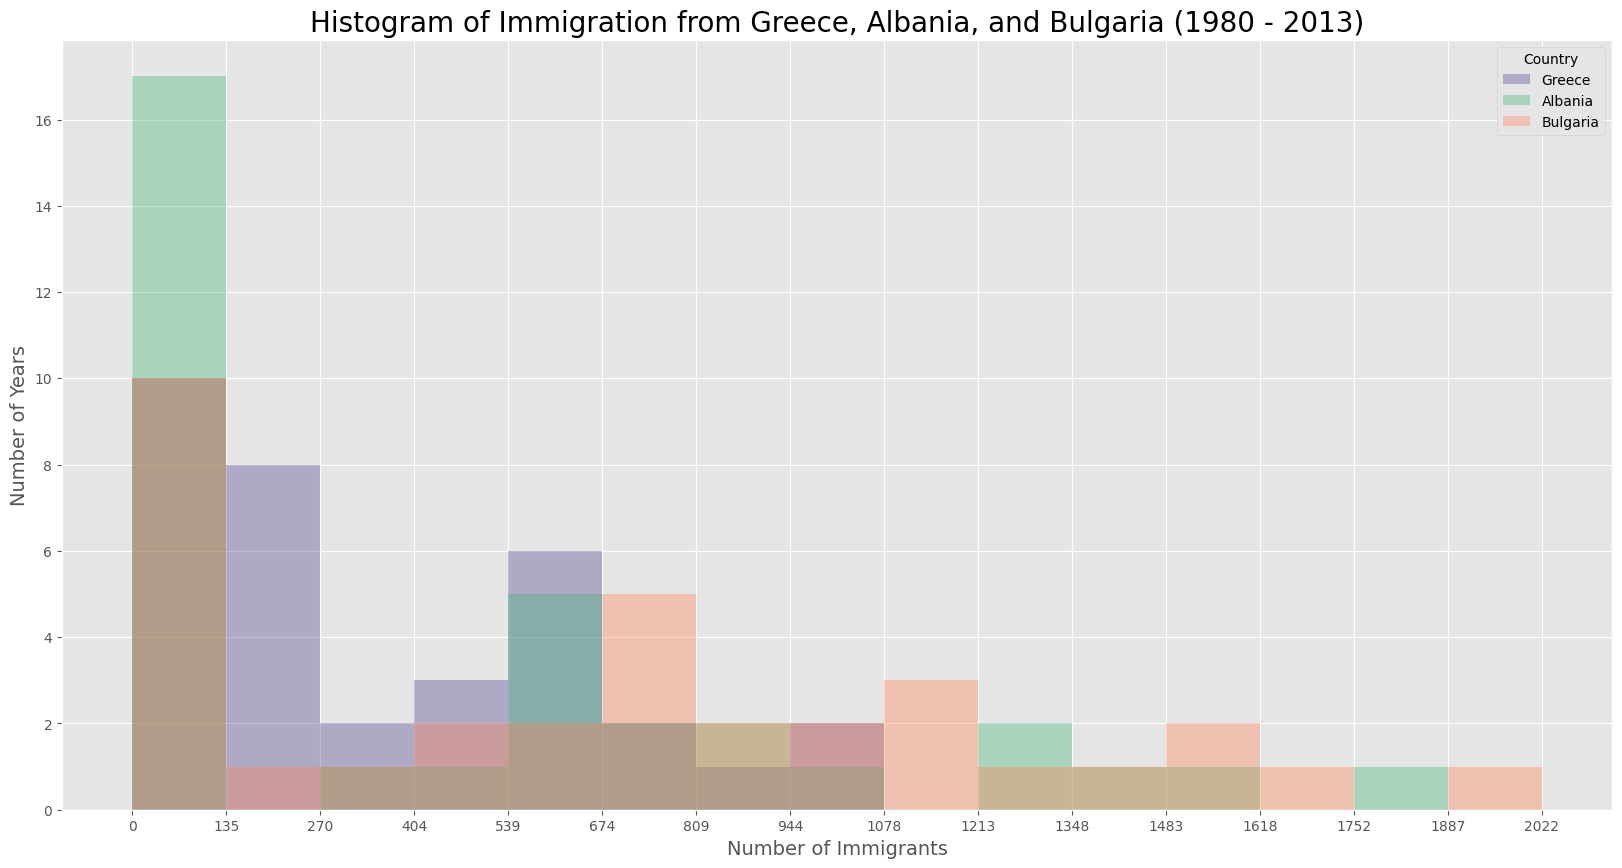

In [71]:
# Extract the data for Greece, Albania, and Bulgaria
df_gab = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df_gab = df_gab.transpose() # transpose the dataframe
df_gab.index = df_gab.index.map(int) # change the index values to type

# Create the edge bins
count, bin_edges = np.histogram(df_gab, 15)

# Create a histogram
df_gab.plot.hist(figsize=(20,10),
                 alpha=0.35, # transparency level
                 bins=15, # number of bins
                 xticks=bin_edges, # set the x-ticks to the 'bin_edges' variable
                 color=['darkslateblue', 'mediumseagreen', 'coral'] # set the color of each histogram
)

# Set the title and labels
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria (1980 - 2013)', fontsize=20)
plt.ylabel('Number of Years', fontsize=14)
plt.xlabel('Number of Immigrants', fontsize=14)

plt.show()

# Bar Charts (Dataframe) <a id='4'></a>

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question**: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.



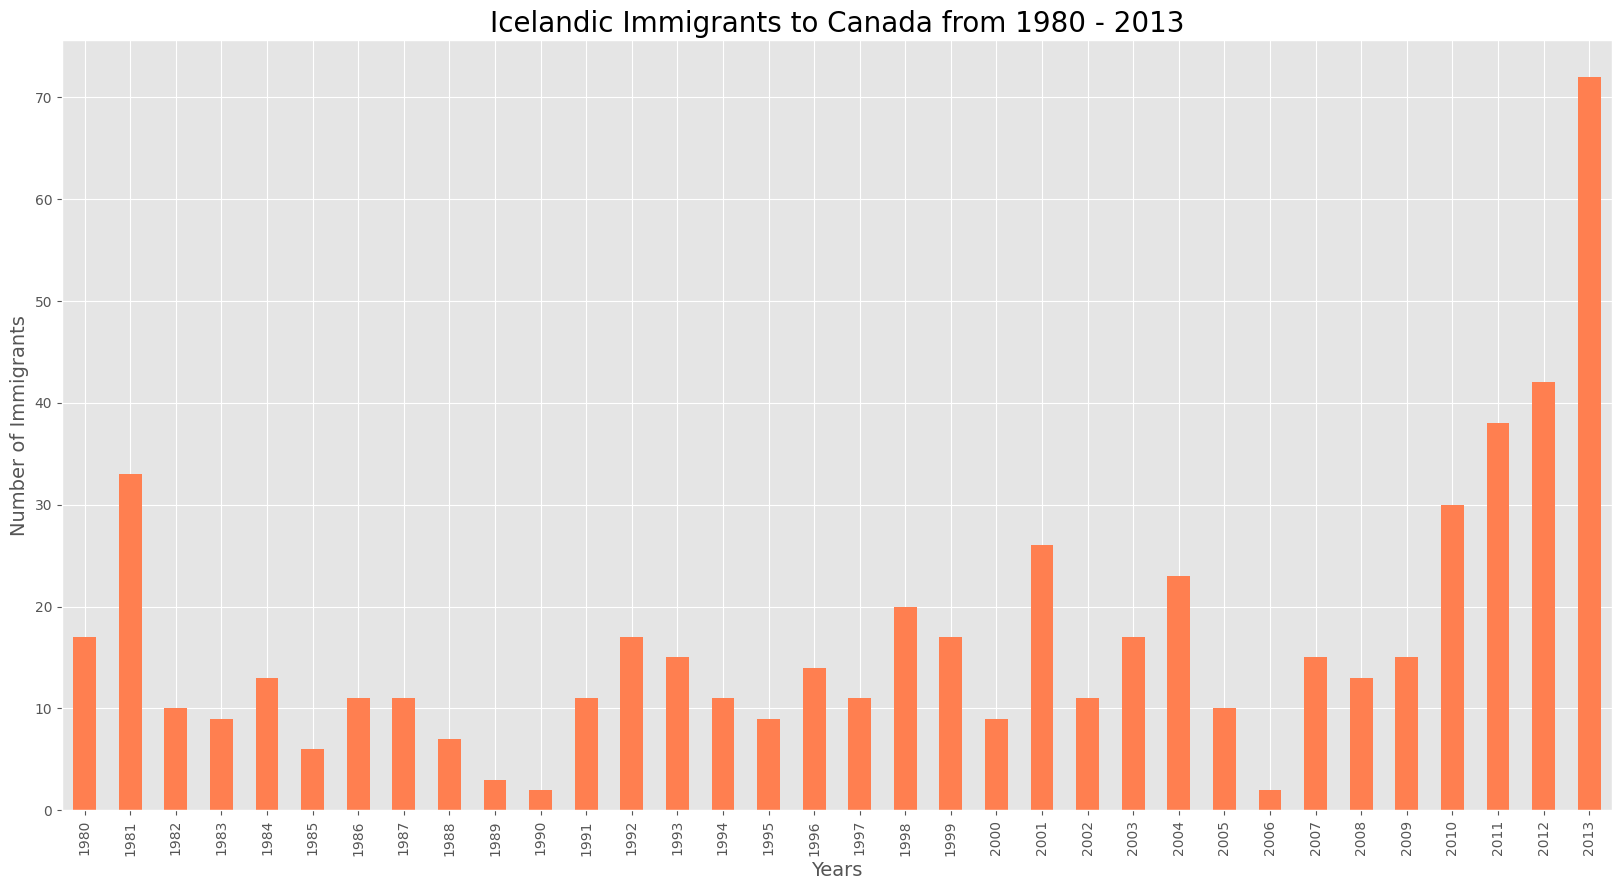

In [77]:
# Extract the data for Iceland
df_iceland = df_can.loc['Iceland', years]

# Create a bar plot
df_iceland.plot(kind='bar',
                 figsize=(20, 10),
                 color='coral'
)

# set the title and labels
plt.title('Icelandic Immigrants to Canada from 1980 - 2013', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html>.


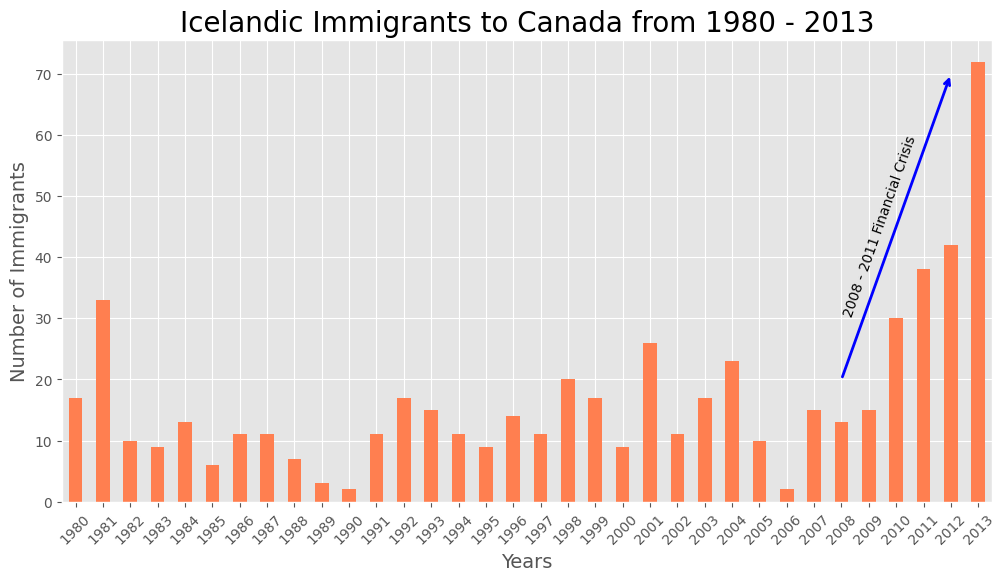

In [83]:
# Extract the data for Iceland
df_iceland = df_can.loc['Iceland', years]

# Create a bar plot
df_iceland.plot(kind='bar',
                 figsize=(12, 6),
                 color='coral',
                 rot=45 # rotate the x-axis labels by 45 degrees
)

# set the title and labels
plt.title('Icelandic Immigrants to Canada from 1980 - 2013', fontsize=20)
plt.ylabel('Number of Immigrants', fontsize=14)
plt.xlabel('Years', fontsize=14)

# Annotate arrow
plt.annotate('', # s: str. Will leave it blank for the text
             xy=(32, 70), # place head of the arrow at point (2012, 70)
             xytext=(28, 20), # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=70.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categorical variables.

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


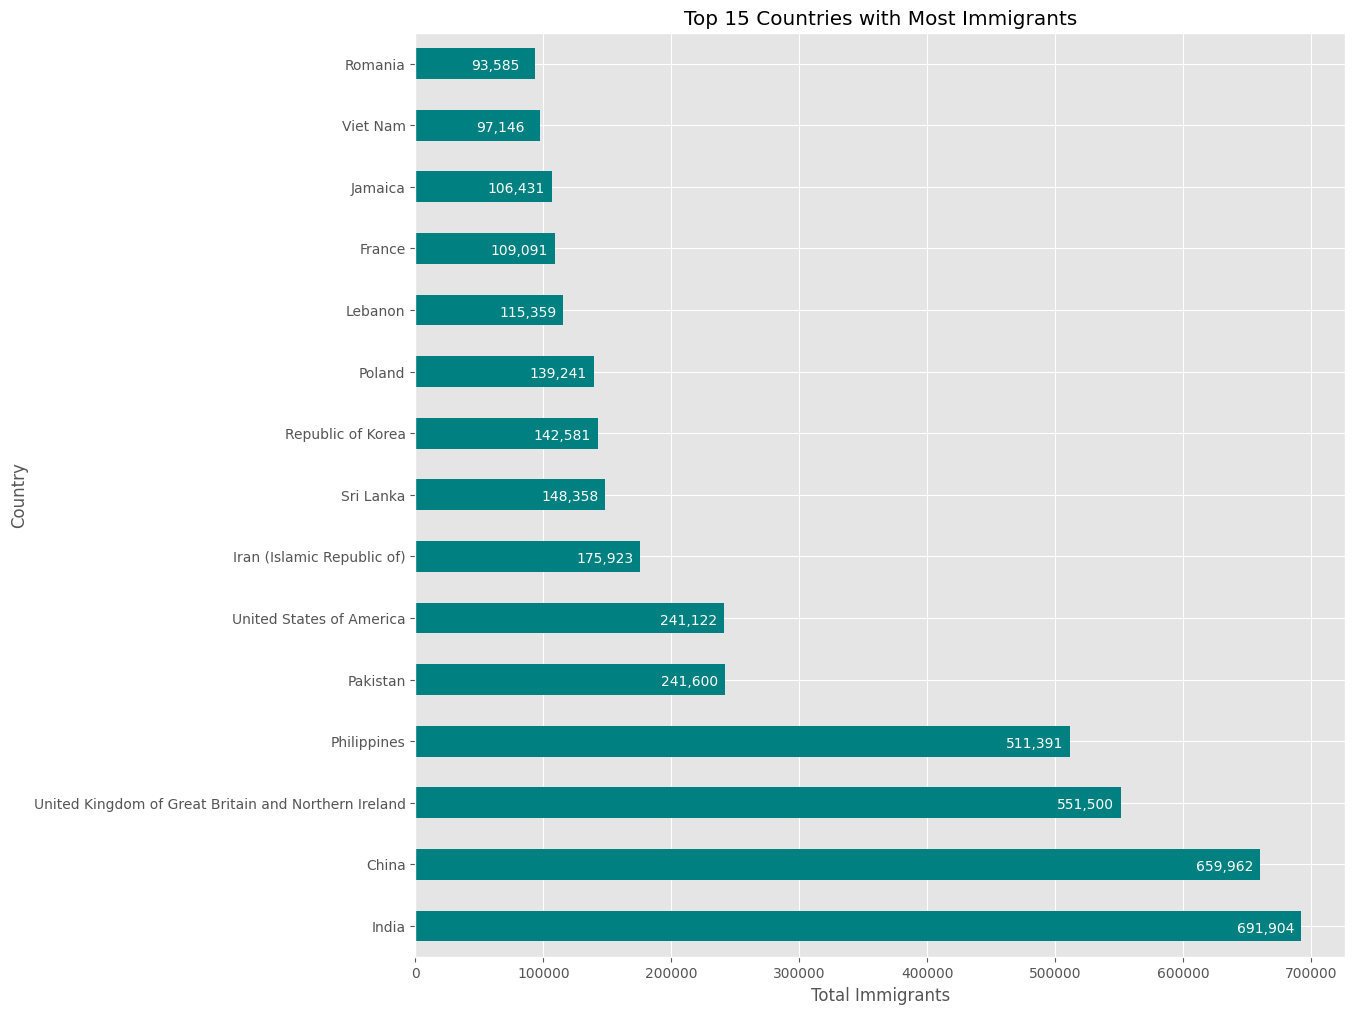

In [108]:
# Extract the top 15 countries
df_top15 = df_can['Total'].head(15)

# Create a horizontal bar chart
df_top15.plot(kind='barh',
              figsize=(12,12),
              color='teal'
)

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, 
                 xy=(value - 50000, index - 0.10), 
                 color='white')

plt.title('Top 15 Countries with Most Immigrants')
plt.xlabel('Total Immigrants')

plt.show()

### Pro Tips:

As you can see that the country name such as "United Kingdom" is too long and taking up so much space. Here's how to fix it:

**Option 1: Use `textwrap` to wrap the long country names.**

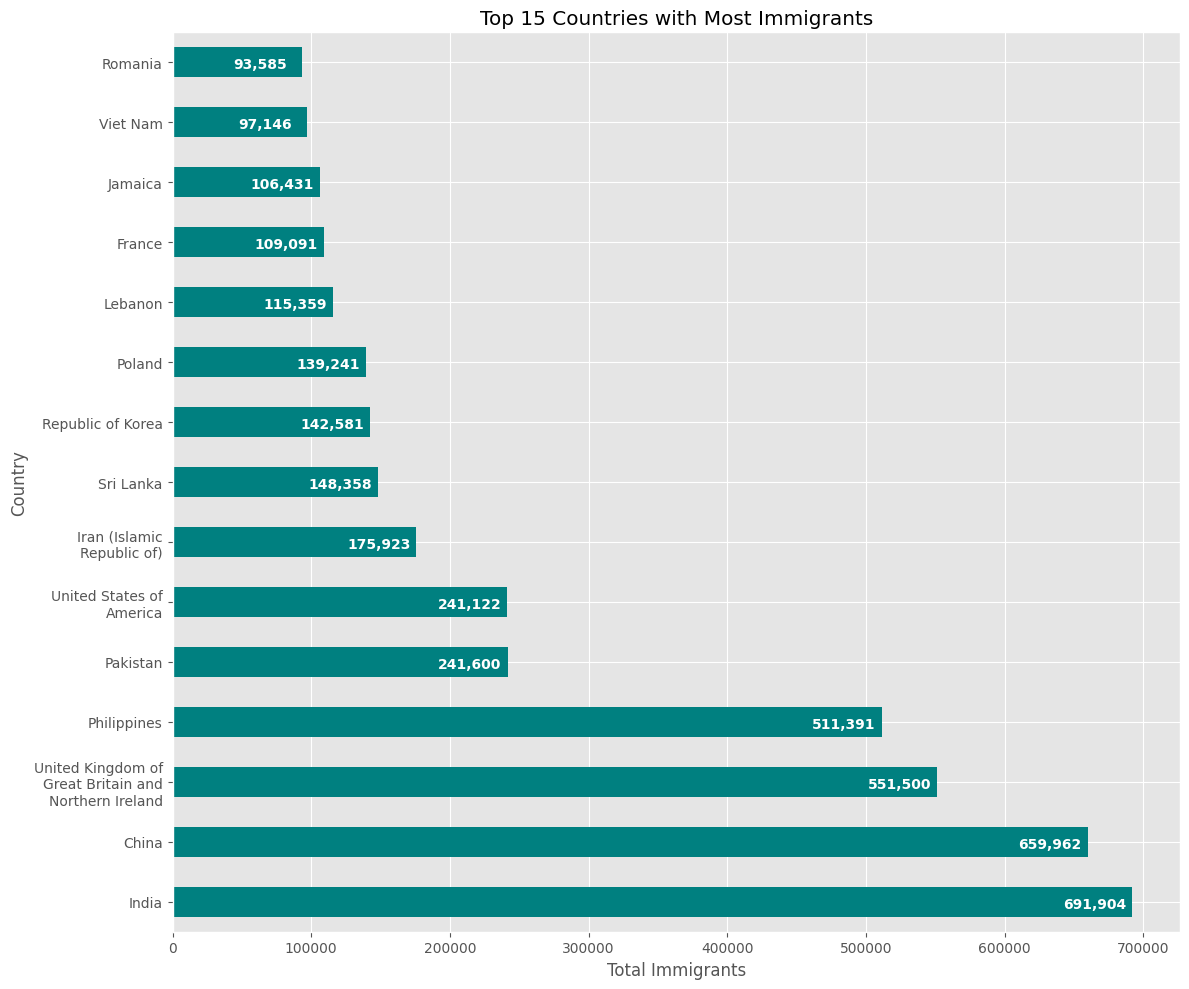

In [113]:
import textwrap

# Extract the top 15 countries
df_top15 = df_can.nlargest(15, 'Total')['Total']

# Create a horizontal bar chart
ax = df_top15.plot(kind='barh', figsize=(12, 10), color='teal')

# Wrap long country names
wrapped_labels = [textwrap.fill(label, width=20) for label in df_top15.index]
plt.yticks(range(len(df_top15)), wrapped_labels)

# Annotate value labels
for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    plt.annotate(label, 
                 xy=(value - 50000, index - 0.10), 
                 color='white',
                 fontweight='bold')

plt.title('Top 15 Countries with Most Immigrants')
plt.xlabel('Total Immigrants')
plt.tight_layout()
plt.show()

**Option 2: Create a `abbreviated_names` list and rename the index**

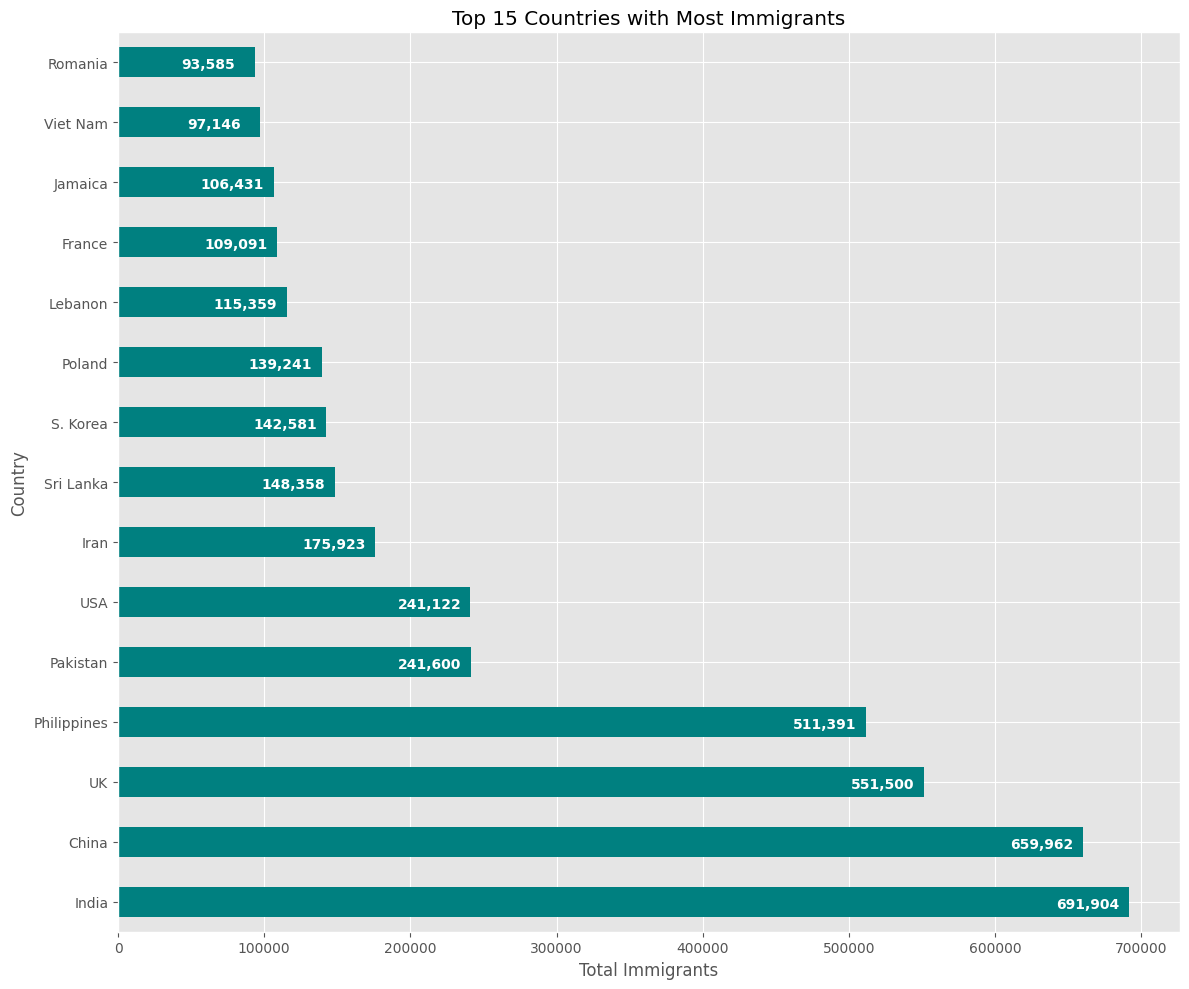

In [116]:
# Extract the top 15 countries
df_top15 = df_can.nlargest(15, 'Total')['Total']

# Abbreviate long country names
abbreviated_names = []
for name in df_top15.index:
    if name == 'United States of America':
        abbreviated_names.append('USA')
    elif name == 'Iran (Islamic Republic of)':
        abbreviated_names.append('Iran')
    elif name == 'Republic of Korea':
        abbreviated_names.append('S. Korea')
    elif name == 'United Kingdom of Great Britain and Northern Ireland':
        abbreviated_names.append('UK')
    else:
        abbreviated_names.append(name)

# Create the plot
ax = df_top15.plot(kind='barh', figsize=(12, 10), color='teal')
plt.yticks(range(len(df_top15)), abbreviated_names)

# Annotate values
for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    plt.annotate(label, 
                 xy=(value - 50000, index - 0.10), 
                 color='white',
                 fontweight='bold')

plt.title('Top 15 Countries with Most Immigrants')
plt.xlabel('Total Immigrants')
plt.tight_layout()
plt.show()

### Thank you for completing this lab!